In [1]:
from sklearn.datasets import load_wine
raw_wine = load_wine()

In [2]:
X = raw_wine.data
y = raw_wine.target

In [3]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [5]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
lle.fit(X_tn_std, y_tn)
X_tn_lle = lle.transform(X_tn_std)
X_te_lle = lle.transform(X_te_std)

In [6]:
print(X_tn_std.shape)
print(X_tn_lle.shape)

(133, 13)
(133, 2)


In [7]:
print(lle.embedding_)

[[ 0.0776621   0.04014035]
 [-0.13790738  0.11577756]
 [ 0.07035477 -0.02010042]
 [-0.12539962  0.07802762]
 [ 0.09154589  0.10203594]
 [-0.09988395 -0.03826698]
 [-0.13547744  0.08740631]
 [ 0.08484341  0.07345405]
 [-0.10845668 -0.17208107]
 [ 0.08280748  0.05061832]
 [ 0.03259236 -0.10478134]
 [-0.13195577  0.11353822]
 [-0.12131518  0.03940527]
 [ 0.05255394 -0.01751337]
 [-0.11883153  0.02979738]
 [-0.12273784  0.04220368]
 [ 0.08000583  0.04044867]
 [-0.08542964 -0.03932018]
 [-0.14093959  0.13869209]
 [ 0.04575976 -0.06811307]
 [-0.11945186  0.03267582]
 [-0.11813828  0.03093619]
 [ 0.04441735 -0.04004733]
 [ 0.08809255  0.08290479]
 [ 0.02147571 -0.04917505]
 [ 0.06823586  0.04042741]
 [-0.03675244 -0.08855167]
 [ 0.06030556 -0.04347175]
 [ 0.08855375  0.09524365]
 [ 0.07110668 -0.03797183]
 [ 0.08272916  0.05458447]
 [-0.12616465  0.05591369]
 [-0.11231048 -0.12245275]
 [ 0.04542778 -0.07455855]
 [ 0.04096888 -0.11422531]
 [ 0.03789877 -0.10276665]
 [-0.12939867  0.09565281]
 

In [8]:
import pandas as pd
lle_columns = ['lle_comp1', 'lle_comp2']
X_tn_lle_df = pd.DataFrame(X_tn_lle,
                            columns=lle_columns)
X_tn_lle_df['target'] = y_tn
X_tn_lle_df.head()

,lle_comp1,lle_comp2,target
0,0.077661,0.040117,0
1,-0.137898,0.115791,2
2,0.070354,-0.020101,1
3,-0.125390,0.077909,2
4,0.091545,0.102031,0


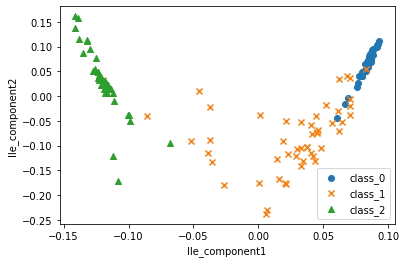

In [10]:
import matplotlib.pyplot as plt
df = X_tn_lle_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['lle_comp1']
    X2 = X_i['lle_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_lle = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle)

In [15]:
from sklearn.metrics import accuracy_score
accruacy = accuracy_score(y_te, pred_rf_lle)
accruacy

0.9555555555555556